<Figure size 1008x360 with 0 Axes>

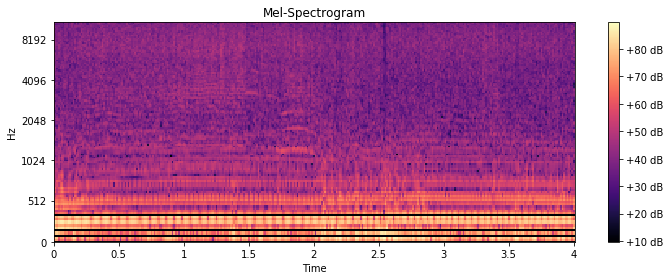

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import torchaudio, torch, librosa.display, librosa
import IPython.display as ipd
import numpy as np

name = 't3_audio_00125.wav'
device = torch.device('cuda:1')

ipd.Audio(name)

wav, sr = torchaudio.load_wav(name)

wav = torchaudio.transforms.Resample(sr, 16000).to(device)(wav.to(device))
mel = torchaudio.transforms.MelSpectrogram().to(device)
plt.figure(figsize=(14, 5))

meldata = mel(wav[0]).cpu().numpy()

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(meldata, ref=13379.048), y_axis='mel', sr=16000, hop_length=200, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel-Spectrogram example.png')
plt.show()

In [48]:
ipd.Audio(name)

In [91]:
print(highwav[0,:100])
print(wav[0,:100])

tensor([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.], device='cuda:1')
tensor([ 21796.4023,  35243.5352,  31679.1602,  33269.4492,  32590.8535,
         32804.0898,  32781.9023,  32781.4297,  32781.4023,  32781.1133,
         32780.1289,  32777.8047,  32781.3242,  32760.8359,  32788.9727,
         32298.3184,  31781.5156,  30351.5547,  28856.9492,  28371.6074,
         26509.6973,  25370.1699,  23114.1035,  20220.7754,  18284.3633,
         17291.0957,  15529.4434,  14274.4678,  12236

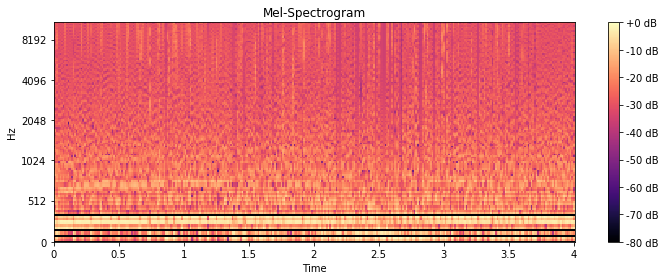

In [88]:
highwav = torchaudio.functional.highpass_biquad(wav,16000, 10)

meldata = mel(highwav[0]).cpu().numpy()
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(meldata, ref=13379.048), y_axis='mel', sr=16000, hop_length=200, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel-Spectrogram example.png')
plt.show()

In [83]:
torchaudio.save('test.wav', highwav.cpu(), sample_rate=16000)

In [84]:
ipd.Audio('test.wav')